In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
from tensorflow.data.experimental import sample_from_datasets

tfkl = tfk.layers

**Preprocessing**

As typical, we'll start with the MNIST data. Recall from last time, we have to do some transformations and preprocessing on these images.

In [2]:
data, info = tfds.load('mnist', with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
preprocess = lambda d: (tf.cast(d["image"], tf.float32)/255, tf.one_hot(d["label"], depth=10))

ds_train = data["train"].map(preprocess).cache().batch(32)
ds_test = data["test"].map(preprocess).cache().batch(32)

In [4]:
img_shape = info.features['image'].shape

In [5]:
img_shape

(28, 28, 1)

**CNNs in TF Keras**

We'll use the Sequential class rely on new layer types that correspond to concepts we covered in lecture: Conv2D, AvgPool2D, MaxPool2D. 

Details such as kernel size, padding, strides and so on must be specified as args to these classes, where appropriate.

In [6]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 1, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(4,4)))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                370       
Total params: 380
Trainable params: 380
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 2s 89ms/step - loss: 2.2977 - val_loss: 2.2860
Epoch 2/20
20/20 [==============================] - 1s 37ms/step - loss: 2.2838 - val_loss: 2.2674
Epoch 3/20
20/20 [==============================] - 1s 38ms/step - loss: 2.2560 - val_loss: 2.2462
Epoch 4/20
20/20 [==============================] - 1s 38ms/step - loss: 2.2363 - val_loss: 2.2207
Epoch 5/20
20/20 [==============================] - 1s 37ms/step - loss: 2.2171 - val_loss: 2.1931
Epoch 6/20
20/20 [==============================] - 1s 37ms/step - loss: 2.1783 - val_loss: 2.1612
Epoch 7/20
20/20 [==============================] - 1s 37ms/step - loss: 2.1519 - val_loss: 2.1280
Epoch 8/20
20/20 [==============================] - 1s 38ms/step - loss: 2.1250 - val_loss: 2.0926
Epoch 9/20
20/20 [==============================] - 1s 37ms/step - loss: 2.0682 - val_loss: 2.0527
Epoch 10/20
20/20 [==============================] - 1s 37ms/step - loss: 2.0350 - val_loss: 2.0100
Epoch 11/

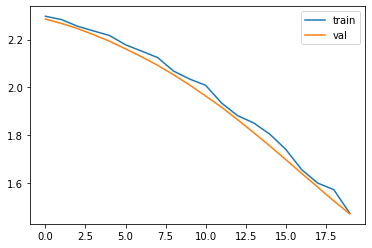

In [9]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Probability')

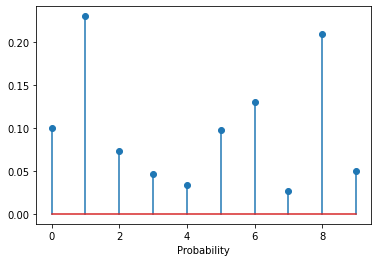

In [10]:
plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")

Which architectural hyperparameters might we change in the above?



**Exercise - Deep CNN**

Build and fit your own CNN model with 3 convolutional **modules**, where each one contains:
  * kernel convolution 
    * you pick number of kernels
    * you pick kernel shape/size
    * you pick activation
  * pooling
  * dropout

We'll use the Fashion MNIST dataset, a low-res collection of images of clothing.

In [11]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
images = images[:, :, :, np.newaxis]
labels = tf.one_hot(labels.astype(np.int32),depth=10)

# optional - TF Datasets objects
#fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
#fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)


4423680/4422102 [==============================] - 0s 0us/step


In [12]:
labels

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

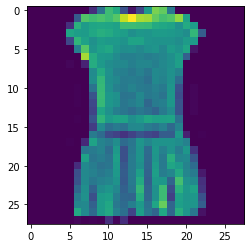

In [13]:
plt.imshow(images[3, :, :, :].squeeze())

In [15]:
# your code here
model = tfk.Sequential()

# block 1
model.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))

# block 2
model.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))

# block 3
model.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=2))
model.add(tfkl.Dropout(.2))

model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [16]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 1s 41ms/step - loss: 2.3148 - val_loss: 2.2987
Epoch 2/20
20/20 [==============================] - 1s 34ms/step - loss: 2.3012 - val_loss: 2.2970
Epoch 3/20
20/20 [==============================] - 1s 36ms/step - loss: 2.2937 - val_loss: 2.2872
Epoch 4/20
20/20 [==============================] - 1s 35ms/step - loss: 2.2946 - val_loss: 2.2822
Epoch 5/20
20/20 [==============================] - 1s 35ms/step - loss: 2.2887 - val_loss: 2.2715
Epoch 6/20
20/20 [==============================] - 1s 36ms/step - loss: 2.2802 - val_loss: 2.2615
Epoch 7/20
20/20 [==============================] - 1s 35ms/step - loss: 2.2650 - val_loss: 2.2432
Epoch 8/20
20/20 [==============================] - 1s 35ms/step - loss: 2.2712 - val_loss: 2.2361
Epoch 9/20
20/20 [==============================] - 1s 36ms/step - loss: 2.2513 - val_loss: 2.2212
Epoch 10/20
20/20 [==============================] - 1s 36ms/step - loss: 2.2358 - val_loss: 2.2028
Epoch 11/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Probability')

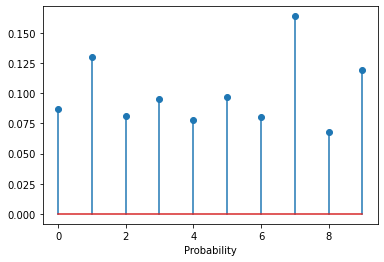

In [17]:
plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")


#|**Exercise - Transfer Learning**



In [19]:
data, info = tfds.load('rock_paper_scissors', with_info=True)
train_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3) )).batch(32)

In [20]:
info.features['image'].shape

(300, 300, 3)

,image,label
0,,2 (scissors)
1,,2 (scissors)
2,,0 (rock)
3,,1 (paper)
4,,0 (rock)
5,,1 (paper)
6,,2 (scissors)
7,,1 (paper)
8,,2 (scissors)
9,,2 (scissors)

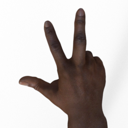
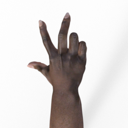
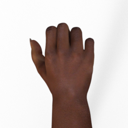
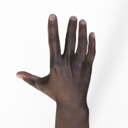
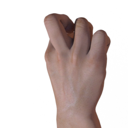
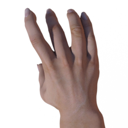
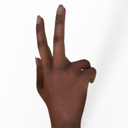
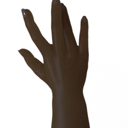
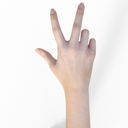
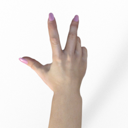

In [21]:
tfds.as_dataframe(data["train"].take(10), info)

# Exercise

1. Build a deep CNN model and train it for this binary classification task. Fit the model using the small dataset of 500 samples, *train_data*.

What accuracy can your model acheive on the training data?

In [22]:
# Your code here
data['train']

<PrefetchDataset shapes: {image: (300, 300, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [24]:
preprocess=lambda d: (tf.cast(d['image'],tf.float32)/255.0, d['label'])
ds_train=data['train'].map(preprocess).cache().batch(32).repeat().prefetch(10)
n_test=info.splits['test'].num_examples
ds_test=data['train'].map(preprocess).cache().take(n_test//4).batch(n_test//4).repeat().prefetch(2)

In [25]:
img_shape=info.features['image'].shape
img_shape

(300, 300, 3)

In [26]:
model=tfk.Sequential([tfkl.InputLayer(img_shape),
                      tfkl.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
                      tfkl.MaxPool2D(pool_size=(3,3)),
                      tfkl.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu),
                      tfkl.MaxPool2D(pool_size=(3,3)), 
                      tfkl.Conv2D(filters=8, kernel_size=(3,3), activation=tf.nn.relu),
                      tfkl.MaxPool2D(pool_size=(3,3)),
                      tfkl.Flatten(),
                      tfkl.Dense(units=100, activation=tf.nn.relu),
                      tfkl.Dense(units=3, activation=tf.nn.softmax)
                      ])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 97, 97, 16)        4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 8)         1160      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)              

In [29]:
opt=tfk.optimizers.Adam()
loss=tfk.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt, loss=loss)
results=model.fit(ds_train, steps_per_epoch=20, epochs=10, validation_data=ds_test, validation_steps=1) 

Epoch 1/10
20/20 [==============================] - 1s 69ms/step - loss: 0.0294 - val_loss: 0.0330
Epoch 2/10
20/20 [==============================] - 1s 64ms/step - loss: 0.0025 - val_loss: 0.0334
Epoch 3/10
20/20 [==============================] - 1s 64ms/step - loss: 0.0052 - val_loss: 0.0278
Epoch 4/10
20/20 [==============================] - 1s 63ms/step - loss: 0.0064 - val_loss: 0.0109
Epoch 5/10
20/20 [==============================] - 1s 64ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 6/10
20/20 [==============================] - 1s 64ms/step - loss: 7.8042e-04 - val_loss: 0.0041
Epoch 7/10
20/20 [==============================] - 1s 64ms/step - loss: 7.5407e-04 - val_loss: 9.4345e-04
Epoch 8/10
20/20 [==============================] - 1s 63ms/step - loss: 2.6312e-04 - val_loss: 0.0028
Epoch 9/10
20/20 [==============================] - 1s 64ms/step - loss: 9.0023e-04 - val_loss: 5.8009e-04
Epoch 10/10
20/20 [==============================] - 1s 63ms/step - loss: 1.8190e-04 

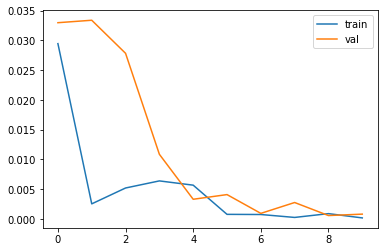

In [32]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(labels=["train", "val"])

 2. Now use transfer learning by incorporating the pretrained VGG16 model.

In [36]:
from tensorflow.keras.applications import VGG16

In [37]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(300,300,3))

58892288/58889256 [==============================] - 0s 0us/step


Build a Sequential model, using our VGG16 base. Make sure the freeze the weights of the convolutional backbone, but leave the remainder of the network weights as learnable. Fit this model and compare the overall accuracy as well as the loss curves (efficiency).


In [45]:
model=tfk.Sequential([
                      tfkl.InputLayer(img_shape),
                      conv_base, 
                      tfkl.Conv2D(filters=8, kernel_size=(2,2),activation=tf.nn.relu),
                      tfkl.MaxPool2D(pool_size=(2,2)),
                      tfkl.Flatten(), 
                      tfkl.Dense(32,activation=tf.nn.relu),
                      tfkl.Dense(3, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 9, 9, 512)         14714688  
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 8)           16392     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 14,735,307
Trainable params: 14,735,307
Non-trainable params: 0
__________________________________________

In [46]:
opt=tfk.optimizers.Adam()
loss=tfk.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
results=model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test, validation_steps=1)

Epoch 1/20
 2/20 [==>...........................] - ETA: 10s - loss: 4.9322 - accuracy: 0.3750WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2213s vs `on_train_batch_end` time: 0.4995s). Check your callbacks.


20/20 [==============================] - 15s 772ms/step - loss: 1.4822 - accuracy: 0.3484 - val_loss: 1.0993 - val_accuracy: 0.3118
Epoch 2/20
20/20 [==============================] - 15s 772ms/step - loss: 1.0988 - accuracy: 0.3250 - val_loss: 1.0993 - val_accuracy: 0.3118
Epoch 3/20
20/20 [==============================] - 15s 763ms/step - loss: 1.0988 - accuracy: 0.3234 - val_loss: 1.0994 - val_accuracy: 0.3118
Epoch 4/20
20/20 [==============================] - 15s 746ms/step - loss: 1.0986 - accuracy: 0.3465 - val_loss: 1.0999 - val_accuracy: 0.3118
Epoch 5/20
20/20 [==============================] - 15s 745ms/step - loss: 1.0989 - accuracy: 0.3375 - val_loss: 1.0991 - val_accuracy: 0.3118
Epoch 6/20
20/20 [==============================] - 15s 753ms/step - loss: 1.0987 - accuracy: 0.3281 - val_loss: 1.0990 - val_accuracy: 0.3118
Epoch 7/20
20/20 [==============================] - 15s 759ms/step - loss: 1.0987 - accuracy: 0.3281 - val_loss: 1.0991 - val_accuracy: 0.2688
Epoch 8/20

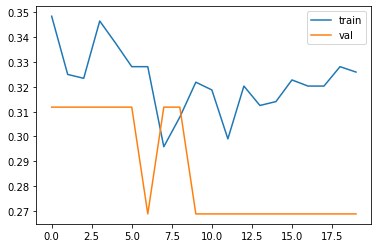

In [47]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(labels=["train", "val"])